# Project: Bank_Marketing Prediction
# Name: Jianwen Wu
# Course: Stat 72456


# Objective:
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

Use Machine Learning Algorithms to predict if the client will subscribe a term deposit.

## Attribute Information:

Input variables:
### Bank Client Data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')
### Related with the Last Contact of the Current Campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone') 

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
### Other Attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
### Social and Economic Context Attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric) 

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
pd.set_option('display.max_columns', 999)
%matplotlib inline

## Load Dataset

In [2]:
bank = pd.read_csv('bank-additional-full.csv', sep = ";")
bank.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Dimensions of Dataset and Structure

In [3]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [4]:
#change the columns name y to deposit
bank = bank.rename(index=str, columns={"y": "deposit"})

In [5]:
bank.shape

(41188, 21)

In [6]:
bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
deposit            object
dtype: object

# Statistical Summary and Correlation Matrix Graph

In [7]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


#### The numerical values have the different scale or different range.  We might need to standardize the data or normalizethe data to improve the accuracy.

In [8]:
bank.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


#### The correlation matrix is little hard to read.  Let's plot it.

In [9]:
#filter out the numerical variables and categorical variables
num_colmuns = []
cat_columns = []
for name, type in dict(bank.dtypes).items():
        if type =='int64' or type == 'float64':
            num_colmuns.append(name)
        else:
            cat_columns.append(name)           

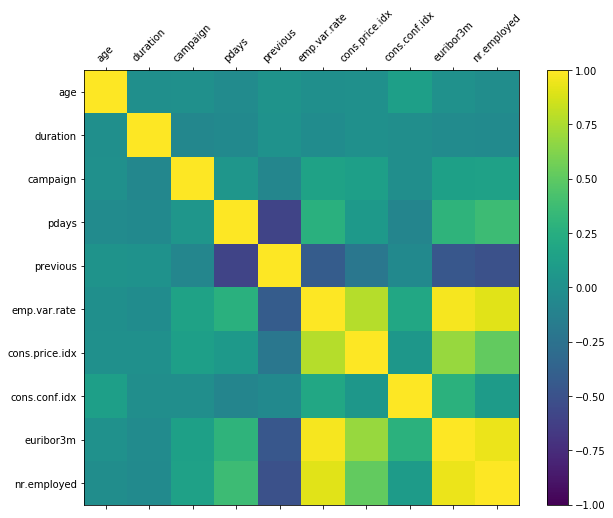

In [10]:
#fig.add_subplot(nrows, ncols, plot_number)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(bank.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,10,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(num_colmuns, rotation = 45)
ax.set_yticklabels(num_colmuns)

#### Based on the correlation plot:
* nr.employed and euribor3m are highly positive correlated.
* nr.employed and emp.var.rate are highly positive correlated.
* euribor3m and emp.var.rate are highly positive correlated.

# Visualization
* Visualize the input numerical variables.
* Visualize the input categorical variables.
* Visualize the target variable.

Many machine learning algorithms assume the normal distribution on input numerical variables.  Plotting the distribution of each numerical variables may help us to correct the skew and improve the accuracy of models by scaling the input variables.

### Histogram of Numerical Variables

In [11]:
num_colmuns

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

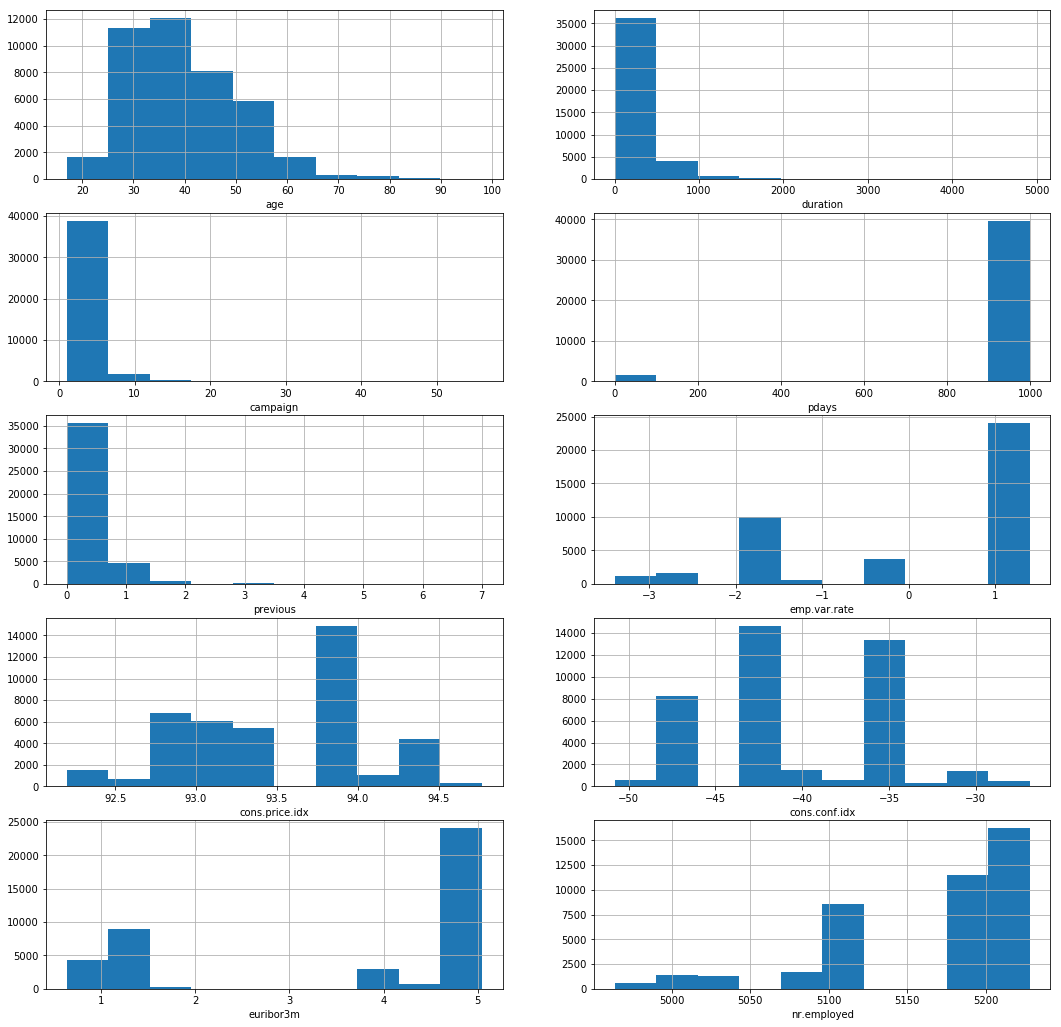

In [12]:
fig = plt.figure(figsize=(18,18))
for r in range(0,10):
    ax = fig.add_subplot(5,2,r+1)
    ax = bank[num_colmuns[r]].hist()
    ax.set_xlabel(num_colmuns[r])

### Bar Plot of Categorical Variables

In [13]:
cat_columns[0:10]

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

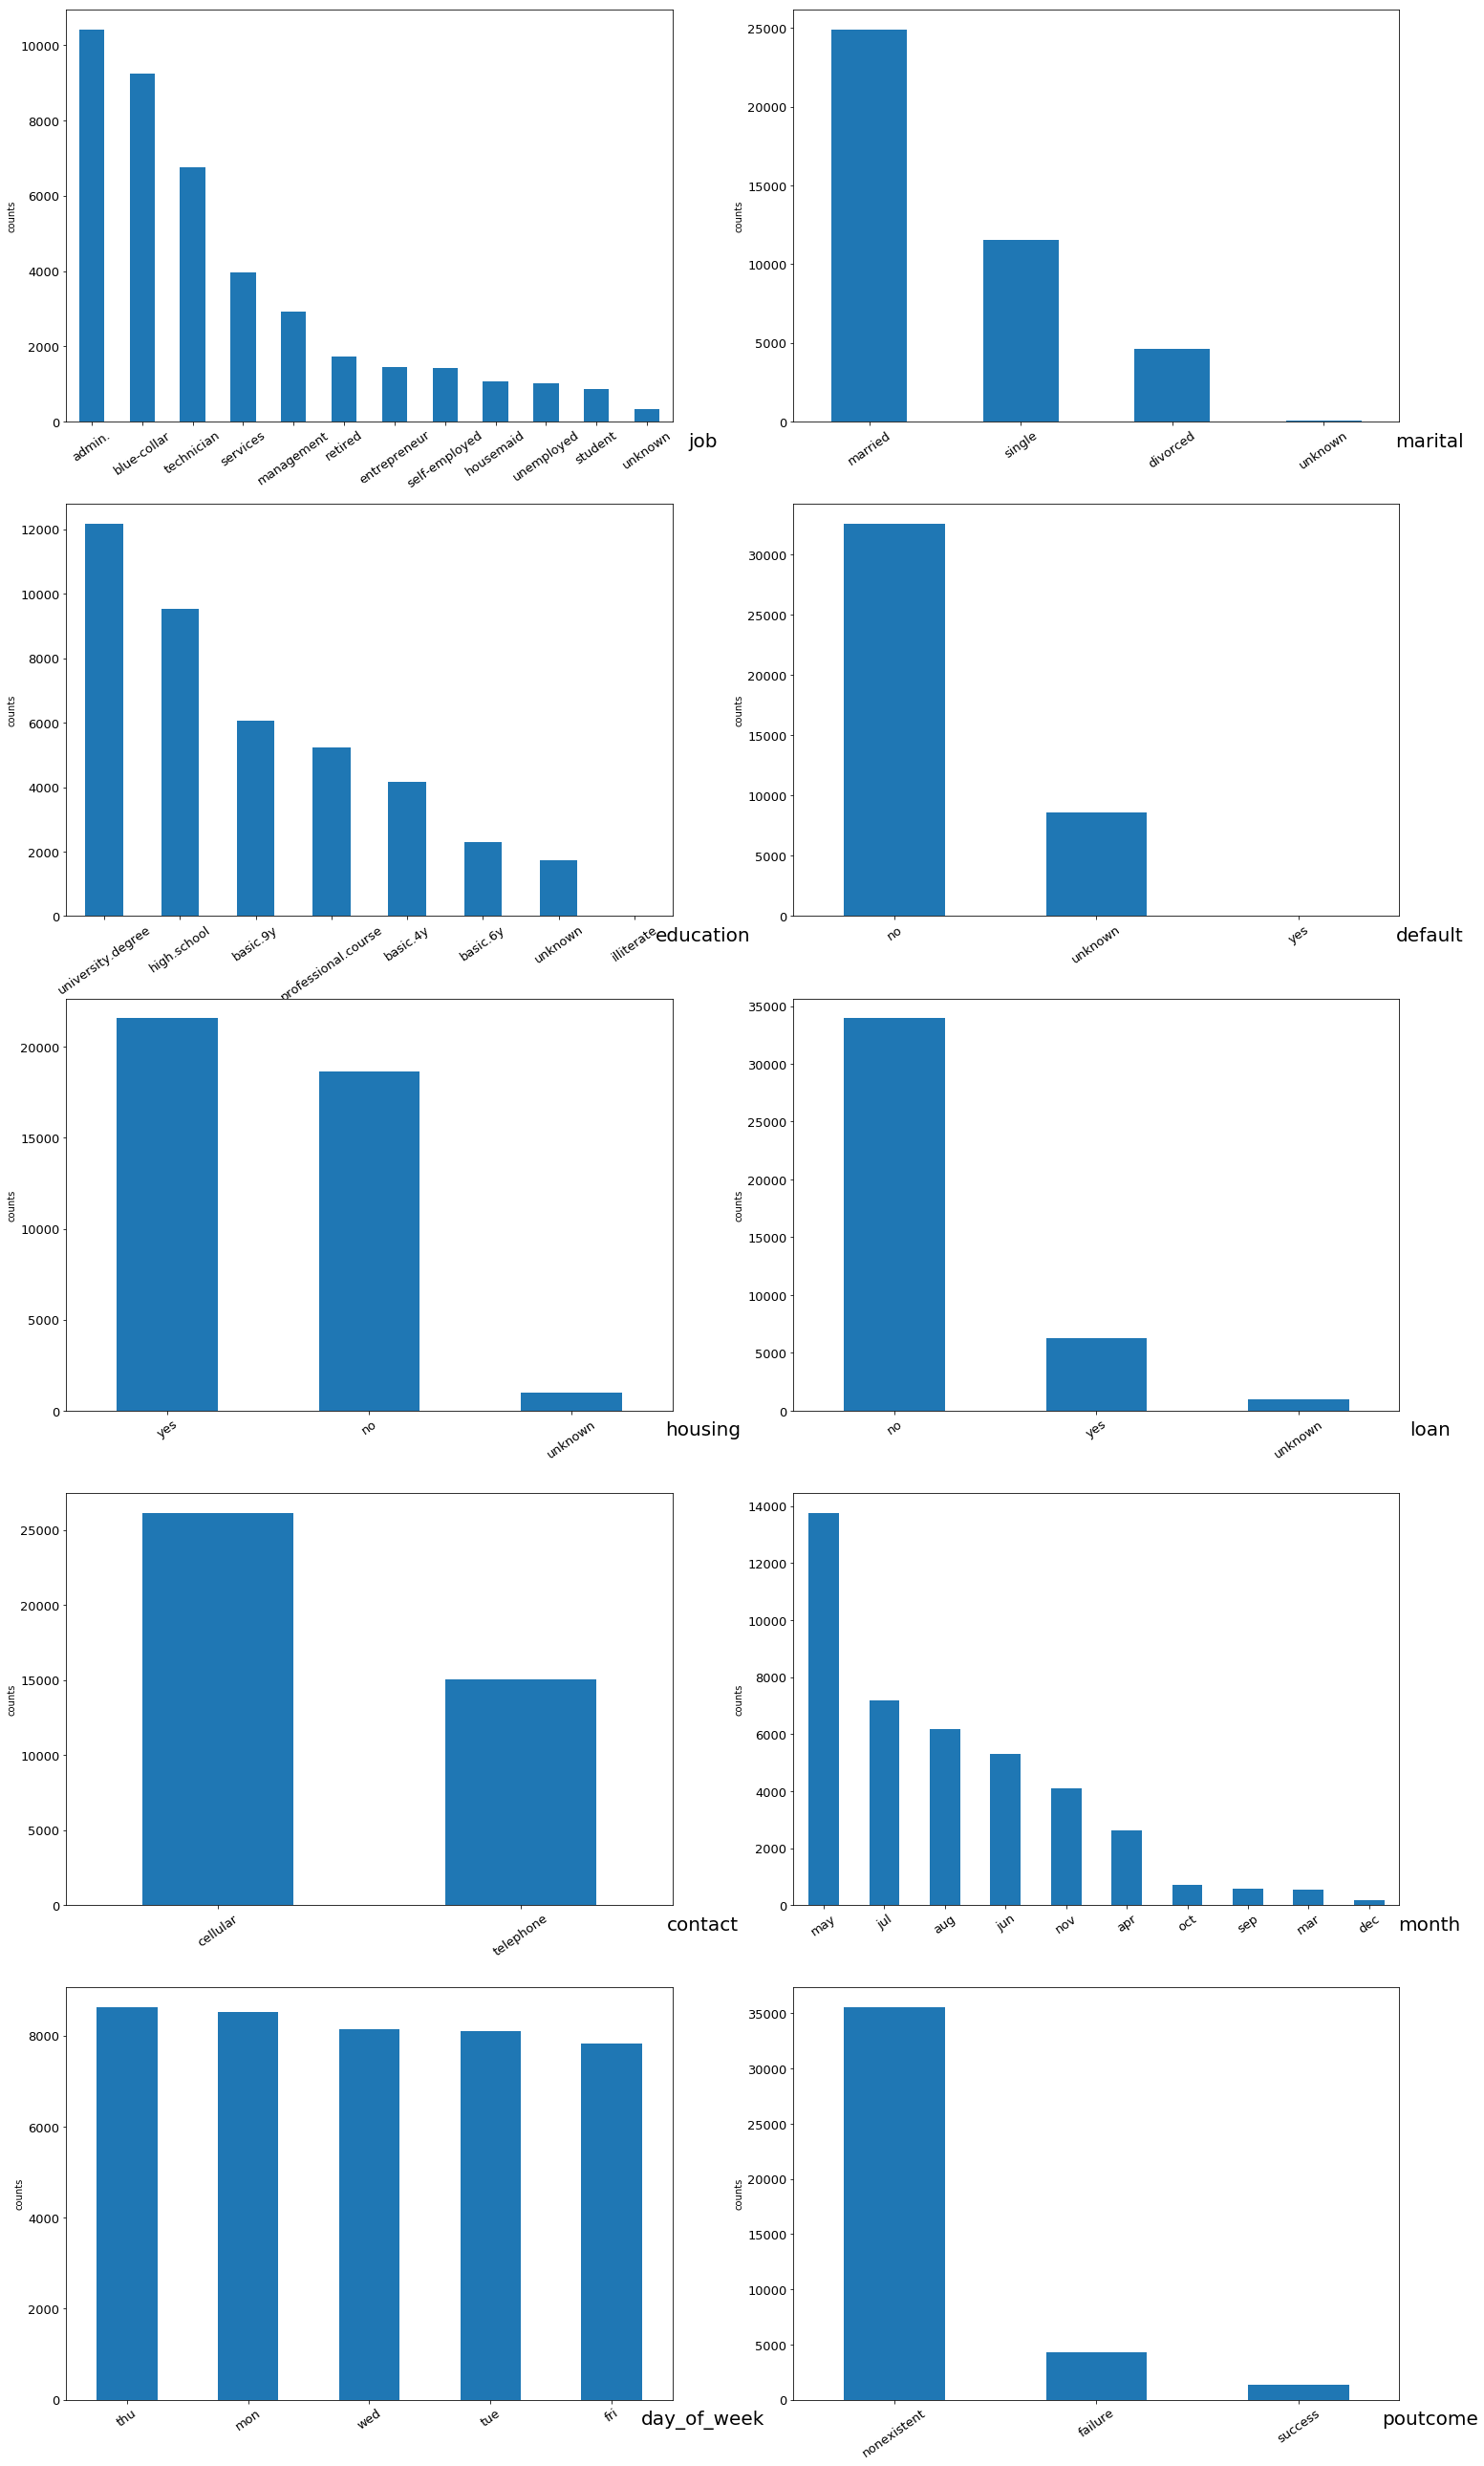

In [14]:
fig = plt.figure(figsize=(25,46))
for r in range(0,10):
    ax = fig.add_subplot(5,2,r+1)
    ax = bank[cat_columns[r]].value_counts().plot(kind = 'bar', rot=35, fontsize = 13)
    ax.set_xlabel(cat_columns[r],fontsize = 20)
    ax.xaxis.set_label_coords(1.05, -0.025)
    ax.set_ylabel('counts')

### Plot the Target Variable

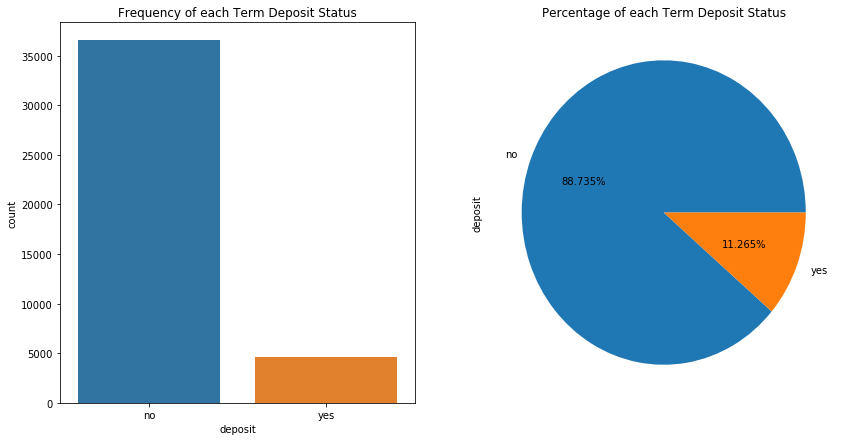

In [15]:
# Set figure size with matplotlib
fig, axs = plt.subplots(1,2,figsize=(14,7))
#create the frequency graph of Target variable deposit
sns.countplot(x='deposit',data=bank, ax=axs[0])
axs[0].set_title("Frequency of each Term Deposit Status")
#create the pie graph of Target variable deposit in term of percentage
bank.deposit.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.3f%%')
axs[1].set_title("Percentage of each Term Deposit Status")

#### Findings: 
* Age is the only variable that might have a normal distribution.
* It looks like the target variable is imbalanced.   It might affect certain machine learning algorithmn.  We will resample the data and make the target variable balance.

# Data Preprocessing / Preparing Features for Machine Learning

### Check the Missing Values

In [16]:
null_counts = bank.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64


In [17]:
print("Data types and their frequency\n{}".format(bank.dtypes.value_counts()))

Data types and their frequency
object     11
int64       5
float64     5
dtype: int64


### Preparing for Categorical Variables / Convert Categorical Variables to Numeric Features

* ####   Map Ordinal Values To Integers
* ####   Encode Nominal Values as Dummy Variables

In [18]:
object_columns_df = bank.select_dtypes(include=['object'])
print(object_columns_df.iloc[0])

job              housemaid
marital            married
education         basic.4y
default                 no
housing                 no
loan                    no
contact          telephone
month                  may
day_of_week            mon
poutcome       nonexistent
deposit                 no
Name: 0, dtype: object


In [19]:
#we need to drop columns month and day_of_week
bank_prepared = bank.drop(['month', 'day_of_week'], axis = 1)

In [20]:
#deposit is Target Variable
cols = ['job', 'marital', 'education', 'default', 'housing','loan', 'contact', 'poutcome']
for name in cols:
    print(name,':')
    print(bank_prepared[name].value_counts(),'\n')

job :
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64 

marital :
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64 

education :
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64 

default :
no         32588
unknown     8597
yes            3
Name: default, dtype: int64 

housing :
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64 

loan :
no         33950
yes         6248
unknown      990
Name: loan, dtype: int64 

contact :
cellular     26144
telephon

#### Nominal Levels:
* job

* marital

* default

* housing

* loan

* contact

* poutcome


#### Ordinal Levels:
* education


In [21]:
#Nomial
Nominal = ['job','marital', 'default', 'housing', 'loan', 'contact', 'poutcome']
dummies = pd.get_dummies(bank[Nominal])

bank_prepared = pd.concat([bank_prepared, dummies],axis=1)
bank_prepared = bank_prepared.drop(Nominal, axis = 1)


#Ordinal
bank_prepared['education'] = bank_prepared['education'].replace(['basic.4y','basic.6y','basic.9y'], 'basic')

mapping_dict = {
    "education": {
        "university.degree": 5,
        "professional.course": 4,
        "basic": 3,
        "high.school": 2,
        "illiterate": 1,
        "unknown": 0
    }
}
bank_prepared = bank_prepared.replace(mapping_dict)

### Preparing for Numerical Variables
* Input variable duration is highly affect the target variables.  Therefore, I will remove it.

In [22]:
bank_prepared = bank_prepared.drop(['duration'], axis = 1)

### Preparing for Target Variable

In [23]:
bank_prepared['deposit'] = bank_prepared['deposit'].map(dict(yes=1, no=0))

In [24]:
bank_prepared['deposit'].value_counts()

0    36548
1     4640
Name: deposit, dtype: int64

# Machine Learning

In [105]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score,GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix,precision_score, recall_score, accuracy_score,classification_report,roc_curve,f1_score    
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.utils import resample
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion

### Split the data into 80% training and 20% testing

In [26]:
validation_size = 0.20
seed = 10
bank_train, bank_test = train_test_split(bank_prepared, test_size=validation_size, random_state=seed)

In [27]:
X_train = bank_train.drop(['deposit'], axis = 1)
Y_train = bank_train['deposit']
X_test = bank_test.drop(['deposit'], axis = 1)
Y_test = bank_test['deposit'] 

In [28]:
Y_train.value_counts(normalize = True)

0    0.887344
1    0.112656
Name: deposit, dtype: float64

In [29]:
Y_test.value_counts(normalize = True)

0    0.887351
1    0.112649
Name: deposit, dtype: float64

## Training Machine Learning Model on Imbalanced Data
* Logistics Regression
* KNN
* Decision Tree
* Naive Bayes

### Using 10 Fold Cross Validation
* Accuracy
* Recall
* Precision
* ROC - Area Under ROC Curve

In [30]:
# Spot Check Algorithms
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Naive Bayes', GaussianNB()))
results = []
names = []
roc = []
for name, model in models:
    cv_results = cross_val_score(model, X_train.values, Y_train.values, cv = 10, scoring = 'accuracy')
    y_train_pred = cross_val_predict(model, X_train.values, Y_train.values, cv = 10)
    roc_results = cross_val_score(model, X_train.values, Y_train.values, cv=10, scoring = 'roc_auc')
    results.append(cv_results)
    names.append(name)
    roc.append(roc_results)
    print("{}\nAccuracy: {:.4f}({:.4f})".format(name, cv_results.mean(), cv_results.std()))
    print("Recall: {:.4f}".format(recall_score(Y_train.values, y_train_pred)))
    print("Precision: {:.4f}".format(precision_score(Y_train.values, y_train_pred)))
    print("ROC: {:.4f}".format(roc_results.mean()))
    print('confusition_matrix')
    print(confusion_matrix(Y_train.values, y_train_pred))
    print('------------------------------------------------')
    print("\n")

Logistic Regression
Accuracy: 0.9001(0.0027)
Recall: 0.1964
Precision: 0.7016
ROC: 0.7699
confusition_matrix
[[28928   310]
 [ 2983   729]]
------------------------------------------------


KNN
Accuracy: 0.8888(0.0034)
Recall: 0.2842
Precision: 0.5114
ROC: 0.7266
confusition_matrix
[[28230  1008]
 [ 2657  1055]]
------------------------------------------------


Decision Tree
Accuracy: 0.8386(0.0058)
Recall: 0.3376
Precision: 0.3024
ROC: 0.6228
confusition_matrix
[[26348  2890]
 [ 2459  1253]]
------------------------------------------------


Naive Bayes
Accuracy: 0.8225(0.0033)
Recall: 0.5086
Precision: 0.3193
ROC: 0.7604
confusition_matrix
[[25213  4025]
 [ 1824  1888]]
------------------------------------------------




#### It looks like imbalance target variable affect the model performance.   The models are biased and will predict as 0 most of time. Models will ignore the minority class in favor of the majority class. We need to balance the target variable.

In [31]:
bank_train['deposit'].value_counts()

0    29238
1     3712
Name: deposit, dtype: int64

## Upsampled to adjust the imbalanced data

In [32]:
# Separate majority and minority classes
bank_majority = bank_train[bank_train['deposit']==0]
bank_minority = bank_train[bank_train['deposit']==1]
 
# Upsample minority class
bank_minority_upsampled = resample(bank_minority, 
                                 replace = True,     # sample with replacement
                                 n_samples = 29238,# to match majority class
                                 random_state=10) # reproducible results
 
# Combine majority class with upsampled minority class
bank_upsampled = pd.concat([bank_majority, bank_minority_upsampled],axis=0)
 
# Display new class counts
bank_upsampled['deposit'].value_counts()

1    29238
0    29238
Name: deposit, dtype: int64

## Train Machine Learning Model on Balanced Data 
* Logstics Regression
* KNN
* Decision Tree
* Navie Bayes

In [33]:
X_train_bal = bank_upsampled.drop(['deposit'], axis = 1)
Y_train_bal = bank_upsampled['deposit']
# Spot Check Algorithms
models_ = []
models_.append(('Logistic Regression', LogisticRegression()))
models_.append(('KNN', KNeighborsClassifier()))
models_.append(('Decision Tree', DecisionTreeClassifier()))
models_.append(('Naive Bayes', GaussianNB()))
results_ = []
names_ = []
roc_ = []
for name, model in models_:
    cv_results_ = cross_val_score(model, X_train_bal.values, Y_train_bal.values, cv = 10, scoring = 'accuracy')
    y_train_pred_ = cross_val_predict(model, X_train_bal.values, Y_train_bal.values, cv = 10)
    results_.append(cv_results_)
    names_.append(name)
    print("{}\nAccuracy: {:.4f}({:.4f})".format(name, cv_results_.mean(), cv_results_.std()))
    print("Recall: {:.4f}".format(recall_score(Y_train_bal.values, y_train_pred_)))
    print("Precision: {:.4f}".format(precision_score(Y_train_bal.values, y_train_pred_)))
    print('confusition_matrix')
    print(confusion_matrix(Y_train_bal.values, y_train_pred_))
    print('------------------------------------------------')
    print("\n")

Logistic Regression
Accuracy: 0.7358(0.0065)
Recall: 0.6695
Precision: 0.7726
confusition_matrix
[[23476  5762]
 [ 9664 19574]]
------------------------------------------------


KNN
Accuracy: 0.8892(0.0036)
Recall: 0.9860
Precision: 0.8260
confusition_matrix
[[23167  6071]
 [  409 28829]]
------------------------------------------------


Decision Tree
Accuracy: 0.9491(0.0039)
Recall: 0.9986
Precision: 0.9071
confusition_matrix
[[26249  2989]
 [   42 29196]]
------------------------------------------------


Naive Bayes
Accuracy: 0.7085(0.0034)
Recall: 0.5976
Precision: 0.7679
confusition_matrix
[[23958  5280]
 [11765 17473]]
------------------------------------------------




#### Decision Tree performed the best with over 94 percent accuracy among these four.


## Train Machine Learning Model on Standardized Numerical Variables

* Scaled the Numerical Variables mean 0 and variance 1

In [34]:
num_colmuns

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [35]:
columns = list(bank_upsampled)
columns.remove('deposit')
num_colmuns.remove('duration')

cat_list_feature = []
num_list_feature = []
for i in columns:
    if i not in num_colmuns:
        cat_list_feature.append(i)
    else:
        num_list_feature.append(i)


In [36]:
# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [37]:
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_list_feature)),
        ('standardized', StandardScaler())
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_list_feature))
    ])

In [38]:
full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [40]:
X_train_scaled = full_pipeline.fit_transform(bank_upsampled)

In [43]:
# Spot Check Algorithms
models__ = []
models__.append(('Logistic Regression Scaled', LogisticRegression()))
models__.append(('KNN Scaled', KNeighborsClassifier()))
models__.append(('Decision Tree Scaled', DecisionTreeClassifier()))
models__.append(('Naive Bayes Scaled', GaussianNB()))
results__ = []
names__ = []
roc__ = []

for name, model in models__:
    cv_results__ = cross_val_score(model, X_train_scaled, Y_train_bal.values, cv = 10, scoring = 'accuracy')
    y_train_pred__ = cross_val_predict(model, X_train_scaled, Y_train_bal.values, cv = 10)
    results__.append(cv_results__)
    names__.append(name)
    print("{}\nAccuracy: {:.4f}({:.4f})".format(name, cv_results__.mean(), cv_results__.std()))
    print("Recall: {:.4f}".format(recall_score(Y_train_bal.values, y_train_pred__)))
    print("Precision: {:.4f}".format(precision_score(Y_train_bal.values, y_train_pred__)))
    print('confusition_matrix')
    print(confusion_matrix(Y_train_bal.values, y_train_pred__))
    print('------------------------------------------------')
    print("\n")

Logistic Regression Scaled
Accuracy: 0.7353(0.0063)
Recall: 0.6656
Precision: 0.7734
confusition_matrix
[[23535  5703]
 [ 9777 19461]]
------------------------------------------------


KNN Scaled
Accuracy: 0.8872(0.0041)
Recall: 0.9863
Precision: 0.8231
confusition_matrix
[[23041  6197]
 [  402 28836]]
------------------------------------------------


Decision Tree Scaled
Accuracy: 0.9485(0.0032)
Recall: 0.9985
Precision: 0.9084
confusition_matrix
[[26295  2943]
 [   45 29193]]
------------------------------------------------


Naive Bayes Scaled
Accuracy: 0.7060(0.0064)
Recall: 0.7331
Precision: 0.6954
confusition_matrix
[[19849  9389]
 [ 7805 21433]]
------------------------------------------------




#### Scaled Logsitics Regression, Scaled  KNN, Scaled  Decision Tree, and Scaled Naive Bayes have same performance as unscaled models.

## Ensemble Methods
* AdaBoost
* Gradient Boosting
* Random Forest


In [44]:
# Spot Check Algorithms
ensembles = []
ensembles.append(('Ada Boost', AdaBoostClassifier()))
ensembles.append(('Gradient Boosting Machine', GradientBoostingClassifier()))
ensembles.append(('Random Forest', RandomForestClassifier()))

results___ = []
names___  = []
for name, model in ensembles:
    cv_results___ = cross_val_score(model, X_train_scaled, Y_train_bal.values, cv = 10, scoring = 'accuracy')
    y_train_pred___ = cross_val_predict(model, X_train_scaled, Y_train_bal.values, cv = 10)
    results___.append(cv_results___)
    names___.append(name)
    print("{}\nAccuracy: {:.4f}({:.4f})".format(name, cv_results___.mean(), cv_results___.std()))
    print("Recall: {:.4f}".format(recall_score(Y_train_bal.values, y_train_pred___)))
    print("Precision: {:.4f}".format(precision_score(Y_train_bal.values, y_train_pred___)))
    print('confusition_matrix')
    print(confusion_matrix(Y_train_bal.values, y_train_pred___))
    print('------------------------------------------------')
    print("\n")

Ada Boost
Accuracy: 0.7441(0.0049)
Recall: 0.6262
Precision: 0.8195
confusition_matrix
[[25206  4032]
 [10930 18308]]
------------------------------------------------


Gradient Boosting Machine
Accuracy: 0.7573(0.0037)
Recall: 0.6513
Precision: 0.8266
confusition_matrix
[[25242  3996]
 [10195 19043]]
------------------------------------------------


Random Forest
Accuracy: 0.9681(0.0016)
Recall: 0.9981
Precision: 0.9408
confusition_matrix
[[27402  1836]
 [   56 29182]]
------------------------------------------------




#### Spot check Algothrimns 
1. I trained Logistics Regression, KNN, Decision Tree, and Navie Bayes on Imbalanced Data.  Logistics Regression performed the best.  However, Logtistics Regression model is biased, and predict 0 most of time.
2. I trained those four models on balanced data.  Decision performed the best.
3. I trained those foul models on scaled balanced data. The results of these foul models performed the same as the unscaled data.
4. Finally, I trained Ada Boosting, Gradient Boosting Machine, Random Forest.  Random Forestperformed the best with 97% accuarcy.

#### Therefore, I will tuning the parameters for Random Forest.

## Random Forest Tuning

In [45]:
#using grid search for tuning parameters
param_grid = [
        {'n_estimators': [200,500], 
         'max_features': [4, 6, 8]}
]
bank_RF = RandomForestClassifier(n_jobs=-1, random_state=42)
#using 5 fold, because it's faster to train.
grid_search = GridSearchCV(bank_RF, param_grid, cv = 5)
grid_search.fit(X_train_scaled, Y_train_bal.values)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [200, 500], 'max_features': [4, 6, 8]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [47]:
#print best parameters
grid_search.best_params_

{'max_features': 8, 'n_estimators': 200}

In [51]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [50]:
cv_clf = grid_search.cv_results_
for mean_score, params in zip(cv_clf["mean_test_score"], cv_clf["params"]):
    print(mean_score.mean(), params)

0.96311307203 {'max_features': 4, 'n_estimators': 200}
0.963266981326 {'max_features': 4, 'n_estimators': 500}
0.964053628839 {'max_features': 6, 'n_estimators': 200}
0.963933921609 {'max_features': 6, 'n_estimators': 500}
0.964600861892 {'max_features': 8, 'n_estimators': 200}
0.964515356728 {'max_features': 8, 'n_estimators': 500}


#### The best parameter for max_features is 8 and best parameter for n_estimators is 200

In [107]:
#train Random Forest using those parameters
best_model = grid_search.best_estimator_
X_test_scaled = full_pipeline.fit_transform(X_test)
final_predictions = best_model.predict(X_test_scaled)
final_accuracy = accuracy_score(Y_test.values,final_predictions)
Recall = recall_score(Y_test.values,final_predictions)
Precision = precision_score(Y_test.values,final_predictions)
F1_Score = f1_score(Y_test.values,final_predictions)
acu_score = roc_auc_score(Y_test.values,final_predictions)
print("Final_Accuracy: {:.4f}".format(final_accuracy))
print("Recall: " + str(Recall))
print("Recall: " + str(Precision))
print("Recall: " + str(F1_Score))
print("acu_area: " + str(acu_score))

Final_Accuracy: 0.8894
Recall: 0.248922413793
Recall: 0.519101123596
Recall: 0.336489439184
acu_area: 0.609823723996


### Confusion Matrix

In [103]:
confusion_matrix(Y_test.values,final_predictions)

array([[7096,  214],
       [ 697,  231]])

# Conclusion:
* Random Forest Performed the best with Cross validation accurary 97% and Test accurary 89%.
* However the area of ACU Curve is only 60%.  As right now, I did not know how to improve.  But, I will continues to work on it.

# Reference:
* Hands-On Machine Learning with Scikit-Learn and TensorFlow by Aurélien Géron.
* Machine Learning Mastery with python by Jason Brownlee